# Data Exploration of the Lehman Baseball Database
## http://seanlahman.com/baseball-archive/statistics
### http://seanlahman.com/files/database/readme2014.txt

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from collections import namedtuple
import datetime as dt
from datetime import date
from datetime import datetime
from IPython.display import Image
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### The data consists of over a dozen CSV files.  They offer a MySQL version but let's see if we can get away without that.

In [2]:
from os import listdir
from os.path import isfile, join
path = 'baseballdatabank-master/core/'
files = [f for f in listdir(path) if isfile(join(path, f)) and f[len(f) - 3:] == 'csv']
print(files)

dfs = {}
for f in files:
    dfs[f] = pd.read_csv(path + f)
    print(f)
    print(dfs[f].columns)

['AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'CollegePlaying.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'HomeGames.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Parks.csv', 'Pitching.csv', 'PitchingPost.csv', 'Salaries.csv', 'Schools.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv']
AllstarFull.csv
Index(['playerID', 'yearID', 'gameNum', 'gameID', 'teamID', 'lgID', 'GP',
       'startingPos'],
      dtype='object')
Appearances.csv
Index(['yearID', 'teamID', 'lgID', 'playerID', 'G_all', 'GS', 'G_batting',
       'G_defense', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf',
       'G_cf', 'G_rf', 'G_of', 'G_dh', 'G_ph', 'G_pr'],
      dtype='object')
AwardsManagers.csv
Index(['playerID', 'awardID', 'yearID', 'lgID', 'tie', 'notes'], dtype='object')
AwardsPlayers.csv
Index(['playerID', 'awa

# Desired Attributes (df name)
* height (height)
* age at debut (age_debut)
* debut year (debut_year)
* birth location
* bats (r or l)
* throws (r or l)
* years of school
* position played most
* number of positions played
* school location
* career year
* OBS
* label

## Master.csv

In [3]:
dfs['Master.csv'].head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


## Height & Weight

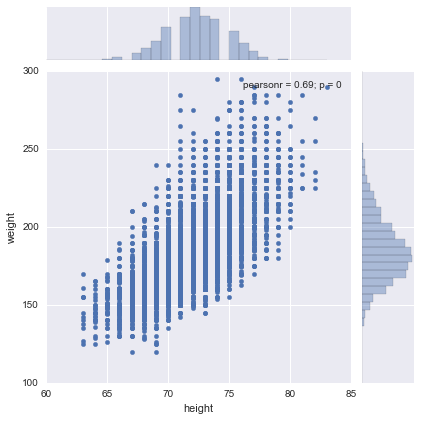

In [4]:
hw = copy(dfs['Master.csv'][['weight','height']])
sns.jointplot(hw['height'], hw['weight'], xlim=(60,85), ylim=(100,300))

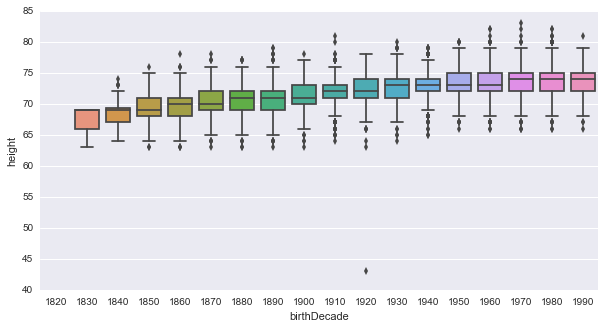

In [5]:
# sns.barplot(h['birthYear'], h['height'])
h = copy(dfs['Master.csv'][['playerID', 'birthYear', 'height']])
d = [str(x)[0:3] + '0' for x in h['birthYear']]
h['birthDecade'] = d
h = h.sort_values(by='birthDecade')
height = h[h['birthDecade'] != 'nan0']
plt.figure(figsize=(10,5))
sns.boxplot(x="birthDecade", y="height", data=height)

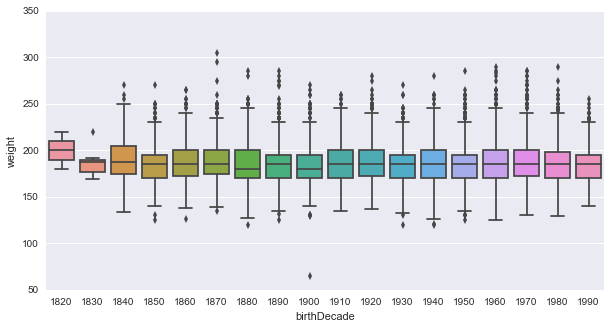

In [6]:
# sns.barplot(h['birthYear'], h['height'])
w = copy(dfs['Master.csv'][['playerID', 'birthYear', 'weight']])
d = [str(x)[0:3] + '0' for x in h['birthYear']]
w['birthDecade'] = d
w = w.sort_values(by='birthDecade')
weight = w[w['birthDecade'] != 'nan0']
plt.figure(figsize=(10,5))
sns.boxplot(x="birthDecade", y="weight", data=weight)

,playerID,birthYear,height,weight,height_2_weight,birthDecade
2794,chadwhe99,1824.0,NaN,NaN,NaN,1820
2650,cartwal99,1820.0,NaN,NaN,NaN,1820
2558,carlle01,1832.0,NaN,NaN,NaN,1830
18672,yeatmbi01,1838.0,NaN,NaN,NaN,1830
13094,pearcdi01,1836.0,63.0,161.0,0.391304,1830


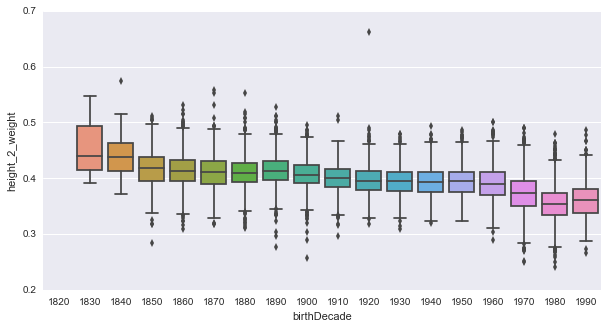

In [7]:
h_w = copy(dfs['Master.csv'][['playerID', 'birthYear', 'height', 'weight']])
h_w['height_2_weight'] = h_w['height'] / h_w['weight']
d = [str(x)[0:3] + '0' for x in h_w['birthYear']]
h_w['birthDecade'] = d
h_w = h_w.sort_values(by='birthDecade')
h_w = h_w[h_w['birthDecade'] != 'nan0']
plt.figure(figsize=(10,5))
sns.boxplot(x="birthDecade", y="height_2_weight", data=h_w)
h_w.head(n=5)

The median height increases over time.  The median weight stays relatively the same.  The height to weight ratio decreases which does not seem to make sense.  It could be explianed by fewer people gaining sigificantly more weight than others.   

In [8]:
h_w_decade = copy(dfs['Master.csv'][['playerID', 'debut', 'height', 'weight']])
#Scatter, the KDE plots just weren't working
h_w_decade['height'] = [x * (1 + random.uniform(-1,1) / 100) for x in h_w_decade['height']]
h_w_decade['weight'] = [x * (1 + random.uniform(-1,1) / 100) for x in h_w_decade['weight']]
h_w_decade = pd.DataFrame([row for idx, row in h_w_decade.iterrows() if type(row.debut) == str])
h_w_decade['debutYear'] = [datetime.strptime(x, '%Y-%m-%d').date().year for x in h_w_decade['debut'] if type(x) == str]
d = [str(x)[0:3] + '0' for x in h_w_decade['debutYear']]
h_w_decade['debutDecade'] = d
h_w_decade = h_w_decade.sort_values(by='debutDecade')
h_w_decade = h_w_decade[h_w_decade['debutDecade'] != 'nan0']

for d in h_w_decade['debutDecade'].unique():
    hwd = h_w_decade[h_w_decade['debutDecade'] == d]
    sns_plot = sns.jointplot(hwd['height'], 
                         hwd['weight'], kind='scatter', 
                         xlim=(60,85), ylim=(100,300))
    sns_plot.fig.text(0.65, 0.72, d + 's', fontsize=20, rotation=0)
    sns_plot.savefig('height_weight' + d + '.png')
    plt.close()

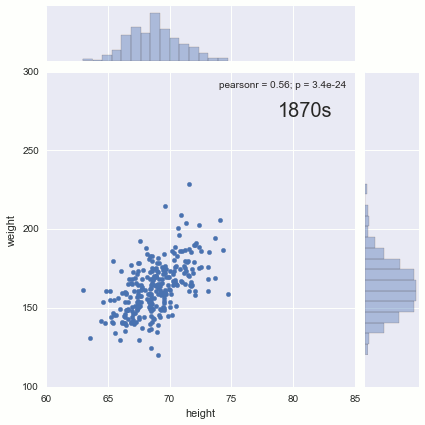

In [9]:
Image(filename='weight_height_animation.png')

Starting around 1990 we see larger gains in weight than height.  Let's examine the hypothesis that the users with a high weight to height ratio are users of PEDs. In the below distribution any play who ever tested positive for PEDs is colored red.  Looking only at 1990 onward, it does not appear that PED users are produced via an alternate underlying distrobution.  Let's call this inconclusive. We are missing 34 of 119 playeres due to quick and sloppy join.  However the lack on signal suggests it's not worth the time to manually annotate the errors.

Pulled from https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_players_suspended_for_performance-enhancing_drugs

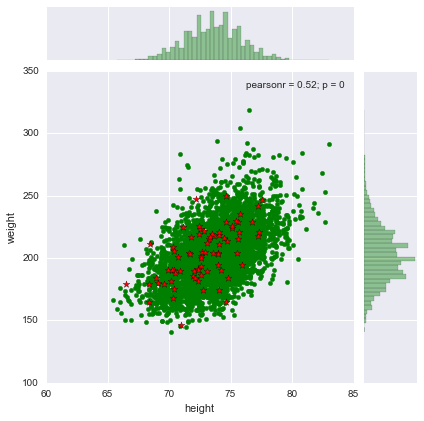

In [10]:
ped = pd.read_csv('known_ped_users.csv', delimiter='\t' )
ped['nameFirst'] = [x.split(' ')[0] for x in ped['name']]
ped['nameLast'] = [x.split(' ')[1] for x in ped['name']]
ped.columns = ['nameGiven', 'team', 'date', 'nameFirst', 'nameLast']
ped_id = ped.merge(copy(dfs['Master.csv']), on=['nameFirst', 'nameLast'])
ped_id = ped_id['playerID'].tolist()

h_w_decade['ped'] = [True if x in ped_id else False for x in h_w_decade['playerID']]
h_w_decade_c = h_w_decade[(h_w_decade['ped'] == False) & (h_w_decade['debutDecade'] >= '1990')]
h_w_decade_d = h_w_decade[(h_w_decade['ped'] == True) & (h_w_decade['debutDecade'] >= '1990')]

graph = sns.jointplot(x=h_w_decade_c.height, y=h_w_decade_c.weight, color='g')
graph.x = h_w_decade_d.height
graph.y = h_w_decade_d.weight
graph.plot_joint(plt.scatter, marker='*', c='r', s=50)

## Age at Debut

In [31]:
ad = copy(dfs['Master.csv'][['playerID', 'birthYear', 'birthMonth', 'birthDay', 'debut']])
d = [str(x)[0:3] + '0' for x in ad['birthYear']]
ad['birthDecade'] = d
ad = ad.sort_values(by='birthDecade')
ad = ad[ad['birthDecade'] != 'nan0']
ad = [row for idx, row in ad.iterrows() if not np.isnan(row.birthDay) 
      and not np.isnan(row.birthMonth) and not np.isnan(row.birthYear)
     and type(row.debut) == str]
ad = pd.DataFrame(ad)
ad['debut'] = [datetime.strptime(x, '%Y-%m-%d').date() for x in ad['debut'] if type(x) == str]
ad['birthYear'] = ad['birthYear'].astype(int)
ad['birthMonth'] = ad['birthMonth'].astype(int)
ad['birthDay'] = ad['birthDay'].astype(int)
ad['birthDate'] = [dt.date(row.birthYear, row.birthMonth, row.birthDay) for idx, row in ad.iterrows()]
ad['age_at_debut'] = [(row.debut - row.birthDate).days for idx, row in ad.iterrows()]
age_debut = ad[ad['age_at_debut'] > 0]
age_debut.head()

,playerID,birthYear,birthMonth,birthDay,debut,birthDecade,birthDate,age_at_debut
2558,carlle01,1832,2,25,1874-09-09,1830,1832-02-25,15537
18672,yeatmbi01,1838,3,10,1872-04-20,1830,1838-03-10,12460
13094,pearcdi01,1836,2,29,1871-05-18,1830,1836-02-29,12862
18605,wrighha01,1835,1,10,1871-05-05,1830,1835-01-10,13264
745,barkeal01,1839,1,18,1871-06-01,1830,1839-01-18,11822


It appears the debut ages aren't correct for at least some of the 1830s

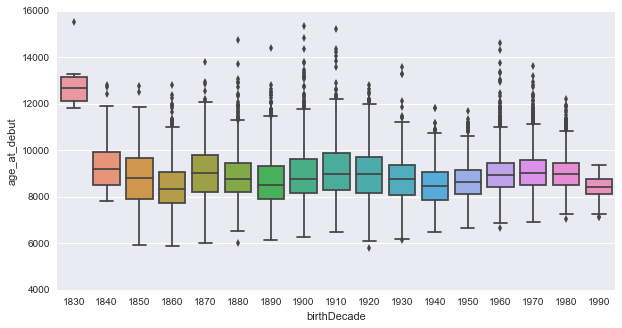

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='birthDecade', y='age_at_debut', data=age_debut)

## Debut Year

In [36]:
debut_year = copy(dfs['Master.csv'][['playerID', 'debut']])
debut_year = pd.DataFrame([row for idx, row in debut_year.iterrows() if type(row.debut) == str])
debut_year['debut_year'] = [datetime.strptime(x, '%Y-%m-%d').date().year for x in debut_year['debut'] if type(x) == str]
debut_year.head()

,playerID,debut,debut_year
0,aardsda01,2004-04-06,2004
1,aaronha01,1954-04-13,1954
2,aaronto01,1962-04-10,1962
3,aasedo01,1977-07-26,1977
4,abadan01,2001-09-10,2001


In [ ]:
ad_grp = debut_year.groupby(by='debut_year').count()
debut_year_cnt = ad_grp.reset_index()
del debut_year_cnt['debut']
debut_year_cnt.columns = ['debut_year', 'count']
debut_year_cnt.head()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(debut_year_cnt['debut_year'], debut_year_cnt['count'])

## Birth Location

In [ ]:
birth_loc = copy(dfs['Master.csv'][['playerID', 'debut', 'birthCountry', 'birthState']])
birth_loc = pd.DataFrame([row for idx, row in birth_loc.iterrows() if type(row.debut) == str])
birth_loc['debutYear'] = [datetime.strptime(x, '%Y-%m-%d').date().year for x in birth_loc['debut'] if type(x) == str]
d = [str(x)[0:3] + '0' for x in birth_loc['debut']]
birth_loc['debutDecade'] = d
birth_loc = birth_loc.sort_values(by='debutDecade')
birth_loc_data = birth_loc[birth_loc['debutDecade'] != 'nan0']
birth_loc_data.head()

In [ ]:
birth_loc_cnt = copy(birth_loc_data.groupby(['birthCountry', 'debutDecade']).count())
birth_loc_cnt = birth_loc_cnt.reset_index()
birth_loc_d_cnt = birth_loc.groupby(['debutDecade']).count()
birth_loc_d_cnt = birth_loc_d_cnt.reset_index()
birth_loc_d_cnt = birth_loc_d_cnt[['debutDecade', 'playerID']]
birth_loc_d_cnt.columns = ['debutDecade', 'count']
birth_loc_d_cnt = birth_loc_d_cnt.sort_values('debutDecade')
birth_loc_cnt = birth_loc_cnt.sort_values('debutDecade').reset_index()
birth_loc_cnt = pd.merge(birth_loc_cnt, birth_loc_d_cnt, on='debutDecade')
birth_loc_cnt = birth_loc_cnt[['birthCountry', 'debutDecade', 'playerID', 'count']]
birth_loc_cnt.columns = ['birthCountry', 'debutDecade', 'count', 'count_decade']
birth_loc_cnt['pct'] = birth_loc_cnt['count'] / birth_loc_cnt['count_decade']
birth_loc_cnt.to_csv('baseball_birth_location_pct.csv')
birth_loc_cnt.head()

How has the nation of origin changed over time?  Let's examine the proportion of rookies from each county by decade.  Using Tableau for this image to make life easier.

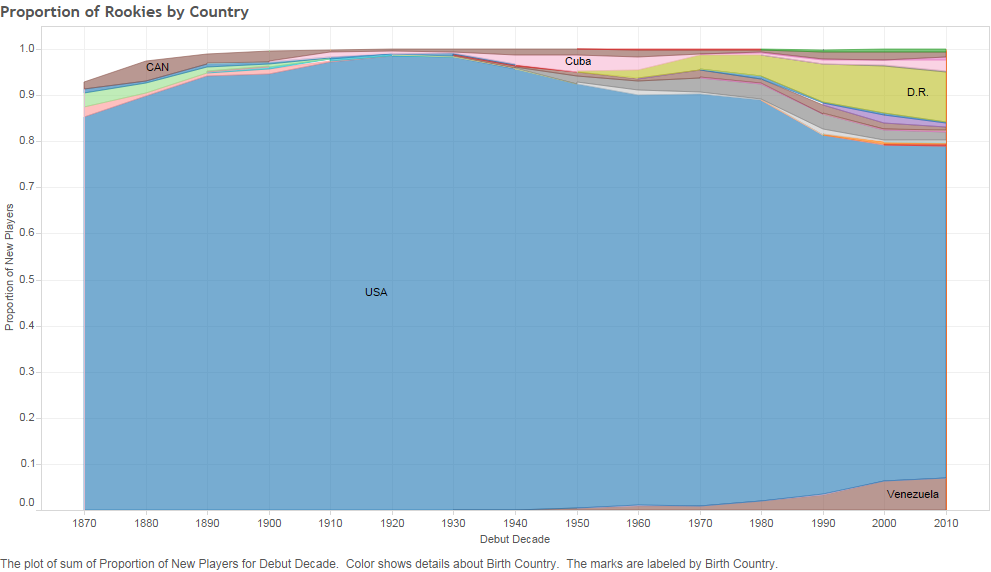

In [38]:
Image(filename='ProportionofRookiesbyCountry.png')

It's doubtful the state date will be as interesting as the country data.  But what if I'm wrong.  Let's have a look.

In [ ]:
birth_loc_cnt = copy(birth_loc_data.groupby(['birthState', 'debutDecade']).count())
birth_loc_cnt = birth_loc_cnt.reset_index()
birth_loc_d_cnt = birth_loc.groupby(['debutDecade']).count()
birth_loc_d_cnt = birth_loc_d_cnt.reset_index()
birth_loc_d_cnt = birth_loc_d_cnt[['debutDecade', 'playerID']]
birth_loc_d_cnt.columns = ['debutDecade', 'count']
birth_loc_d_cnt = birth_loc_d_cnt.sort_values('debutDecade')
birth_loc_cnt = birth_loc_cnt.sort_values('debutDecade').reset_index()
birth_loc_cnt = pd.merge(birth_loc_cnt, birth_loc_d_cnt, on='debutDecade')
birth_loc_cnt = birth_loc_cnt[['birthState', 'debutDecade', 'playerID', 'count']]
birth_loc_cnt.columns = ['birthState', 'debutDecade', 'count', 'count_decade']
birth_loc_cnt['pct'] = birth_loc_cnt['count'] / birth_loc_cnt['count_decade']
birth_loc_cnt.to_csv('baseball_birth_state_pct.csv')
birth_loc_cnt.head()

One-hot warmup, just wait and do all the one-hots together at the end

In [ ]:
birth_loc = copy(dfs['Master.csv'][['playerID', 'debut', 'birthCountry', 'birthState']])
le = LabelEncoder()
enc = OneHotEncoder()
birth_loc['birthCountry'] = ['NA' if type(x) != str else x for x in birth_loc['birthCountry']]
birth_loc['birthCountry'] = le.fit_transform(birth_loc['birthCountry'])
birth_loc['birthState'] = ['NA' if type(x) != str else x for x in birth_loc['birthState']]
birth_loc['birthState'] = le.fit_transform(birth_loc['birthState'])
birth_loc[['birthCountry', 'birthState']]

enc.fit(birth_loc[['birthCountry', 'birthState']])

d = enc.transform(birth_loc[['birthCountry', 'birthState']]).toarray()
d.shape, d.sum()

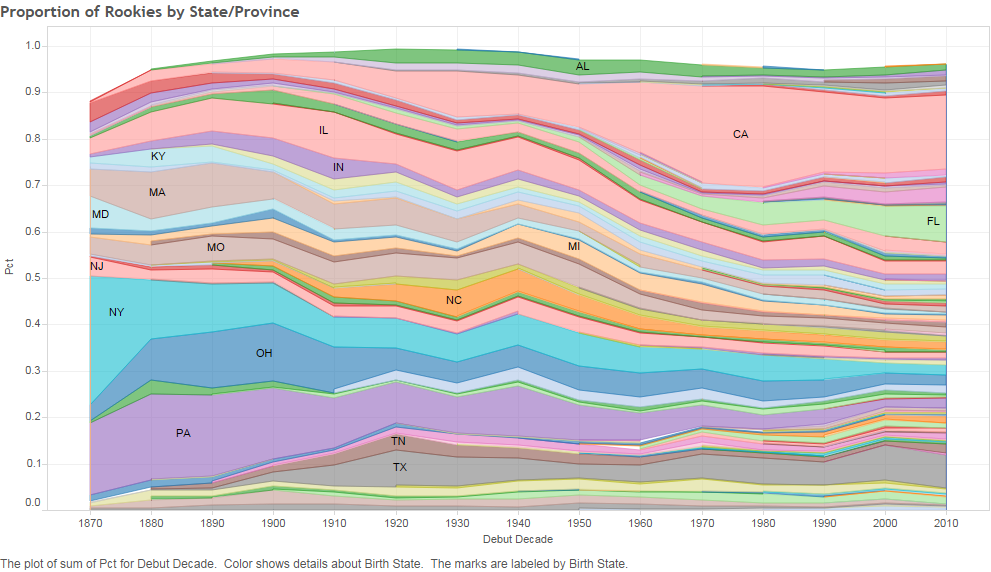

In [37]:
Image(filename='ProportionofRookiesbyStateProvince.png')

## Bats & Throws Right or Left in Master Table

In [ ]:
master = copy(dfs['Master.csv'])
master.shape, master.columns, master.head()

## Years of School
### College itself should be a feature

In [16]:
college = copy(dfs['CollegePlaying.csv'])
print (college.shape, college.columns, college.head())
college_cnt = college.groupby(by='playerID').count()
college_cnt = college_cnt.reset_index()
college_cnt = college_cnt[['playerID', 'yearID']]
college_cnt.columns = ['playerID', 'yearsCollege']
college_cnt.head()

(17350, 3) Index(['playerID', 'schoolID', 'yearID'], dtype='object')     playerID schoolID  yearID
0  aardsda01   pennst    2001
1  aardsda01     rice    2002
2  aardsda01     rice    2003
3   abadan01  gamiddl    1992
4   abadan01  gamiddl    1993


,playerID,yearsCollege
0,aardsda01,3
1,abadan01,2
2,abbeybe01,4
3,abbotje01,3
4,abbotji01,3


## School Info

In [50]:
school = dfs['Schools.csv']
# school.shape, school.head()
# college.head()
college_info = college.merge(school, on='schoolID')
college_info.shape, college_info.head()

college_cnt = college_info.groupby(by=['playerID', 'schoolID']).count()
college_cnt = college_cnt.reset_index()
college_cnt = college_cnt[['playerID', 'schoolID', 'yearID']]
college_cnt.columns = ['playerID', 'schoolID', 'yearsThisCollege']
college_cnt.head()

,playerID,schoolID,yearsThisCollege
0,aardsda01,pennst,1
1,aardsda01,rice,2
2,abadan01,gamiddl,2
3,abbeybe01,vermont,4
4,abbotje01,kentucky,3


## Positions Played
### Thinking rookies season here, if we are going to use rookie year data as features to make a prediction about year n.  Originally the plan was to use postion played the most and number of positions played seperatly.  But I think we could just use these numbers as they are.  Just need to handle players with multiple teams in their rookie year.

In [30]:
appearances = copy(dfs['Appearances.csv'])
# print (appearances.shape, appearances.head())

debut = copy(dfs['Master.csv'][['playerID', 'debut']])
debut = pd.DataFrame([row for idx, row in debut.iterrows() if type(row.debut) == str])
debut['yearID'] = [datetime.strptime(x, '%Y-%m-%d').date().year for x in debut['debut'] if type(x) == str]
# print (debut.shape, debut.head())

rookiesAppearances = appearances.merge(debut, on=['playerID', 'yearID'])
# print (rookiesAppearances.shape, rookiesAppearances.head())

rookiesAppearances_sum = rookiesAppearances.groupby(by='playerID').sum()
rookiesAppearances_sum = rookiesAppearances_sum.reset_index()
rookiesAppearances_sum = rookiesAppearances_sum[['playerID', 'G_all', 'GS', 'G_batting', 'G_defense', 
                                                 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 
                                                 'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 
                                                 'G_ph','G_pr']]

rookiesAppearances_cnt = rookiesAppearances.groupby(by='playerID').count()
rookiesAppearances_cnt = rookiesAppearances_cnt.reset_index()
rookiesAppearances_cnt = rookiesAppearances_cnt[['playerID', 'teamID']]
rookiesAppearances_cnt.columns = ['playerID', 'numberTeams']

rookiesAppearances_cnt.head()

rookiesAppearances = rookiesAppearances_sum.merge(rookiesAppearances_cnt, on='playerID')
rookiesAppearances.shape, rookiesAppearances['numberTeams'].sum(), rookiesAppearances.head()

((18648, 19),
 19167,
     playerID  G_all   GS  G_batting  G_defense  G_p  G_c  G_1b  G_2b  G_3b  \
 0  aardsda01   11.0  0.0         11       11.0   11    0     0     0     0   
 1  aaronha01  122.0  NaN        122      122.0    0    0     0     0     0   
 2  aaronto01  141.0  NaN        141      141.0    0    0   110     1     1   
 3   aasedo01   13.0  0.0          0       13.0   13    0     0     0     0   
 4   abadan01    1.0  0.0          1        1.0    0    0     1     0     0   
 
    G_ss  G_lf  G_cf  G_rf  G_of  G_dh  G_ph  G_pr  numberTeams  
 0     0     0     0     0     0   0.0   0.0   0.0            1  
 1     0   105     0    11   116   NaN   NaN   NaN            1  
 2     0    42     0     0    42   NaN   NaN   NaN            1  
 3     0     0     0     0     0   0.0   0.0   NaN            1  
 4     0     0     0     0     0   0.0   1.0   0.0            1  )

## Nth Season
We may want to make predictions about a players nth season

In [119]:
appearances = copy(dfs['Appearances.csv'])
appearances_grp = appearances.groupby(by=['playerID', 'yearID']).count()
appearances_grp = appearances_grp.reset_index()

n = 12
appearances_nth = appearances_grp.groupby(by='playerID').nth(n)
appearances_nth = appearances_nth.reset_index()
appearances_nth = appearances_nth[['playerID', 'yearID']]
appearances_nth.columns = ['playerID', str(n) + 'th year']
appearances_nth.head()

# appearances = copy(dfs['Appearances.csv'])
# a_player = appearances[appearances['playerID'] == 'abreubo01']
# a_player

,playerID,12th year
0,aaronha01,1966
1,aasedo01,1990
2,abernte02,1971
3,abreubo01,2008
4,adairje01,1970


## On-base Plus Slugging

The following abbreviations are used in this section:
<table>
    <tr><td>H = hits</td><td>BB = Bases on Balls</td></tr>
    <tr><td>HBP = Hit by Pitch</td><td>AB = At Bats</td></tr>
    <tr><td>SF = Sacrifice Flies</td><td>1B = Single Base Hit</td></tr>
    <tr><td>2B = Double Base Hit</td><td>3B = Triple Base Hit</td></tr>
    <tr><td>4B = Homerun</td><td></td></tr>
</table>

Batting Average (BA):  
$$BA = \frac{H}{AB}$$

Batting average is a poor metric if one wishes to measure a player’s ability to place themselves in a scoring position. It does not take into account the number of times a player is walked.  If a player makes it to a base, even via a walk, that player is then in a position to score. Unlike batting average, the on-base percentage takes into account the likelihood a batter will make it onto a base.

On-Base Percentage (OBP):
$$OBP = \frac{H + BB + HBP}{AB + BB + HBP + SF}$$

An additional measure of a players hitting ability is the sluggingpercentage. The slugging percentage indicates the number of bases a players reaches per at bat.

Singles are not in the data:
$$ 1B = H - 2B - 3B - HR  $$

Slugging Percentage:
$$SP = \frac{1B + (2∗2B) + (3∗3B) + (4∗HR)}{AB}$$

On-Base Plus Slugging:
$$OBS = OBP + SP$$


First this we want to do is reduce multiple team in a season to one aggregate line, by player and year.

In [312]:
batting = dfs['Batting.csv']
batting.columns
batting_groupby = batting.groupby(by=['playerID', 'yearID'])

batting_sum = batting_groupby.sum()
batting_sum = batting_sum.reset_index()
del batting_sum['stint']
batting_player_year = batting_sum
print ( batting_player_year.columns )
batting_player_year.head()

Index(['playerID', 'yearID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')


,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2004,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,45,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,47,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
batting = dfs['Batting.csv']
batting.columns
batting_groupby = batting.groupby(by=['playerID', 'yearID'])

batting_sum = batting_groupby.sum()
batting_sum = batting_sum.reset_index()
del batting_sum['stint']
batting_player_year = batting_sum

batting_player_year['BA'] = batting_player_year.H / batting_player_year.AB

# Missing values cause trouble
batting_player_year.H = [0 if np.isnan(x) else x for x in batting_player_year.H]
batting_player_year.BB = [0 if np.isnan(x) else x for x in batting_player_year.BB]
batting_player_year.HBP = [0 if np.isnan(x) else x for x in batting_player_year.HBP]
batting_player_year.AB = [0 if np.isnan(x) else x for x in batting_player_year.AB]
batting_player_year.SF = [0 if np.isnan(x) else x for x in batting_player_year.SF]

batting_player_year['OBP'] = (batting_player_year.H + batting_player_year.BB + 
                              batting_player_year.HBP) / ( batting_player_year.AB + 
                                batting_player_year.BB + batting_player_year.HBP + 
                                                             batting_player_year.SF )

batting_player_year.OBP = [0 if np.isnan(x) else x for x in batting_player_year.OBP]

batting_player_year['1B'] = batting_player_year.H - batting_player_year['2B'] - batting_player_year['3B'] - batting_player_year['HR']

batting_player_year['SP'] = (batting_player_year['1B'] + 2*batting_player_year['2B'] + 
                          3*batting_player_year['3B'] + 4*batting_player_year['HR']) / (batting_player_year.AB)

batting_player_year['OBS'] = batting_player_year.OBP + batting_player_year.SP

batting_player_year.OBS = [0 if np.isnan(x) else x for x in batting_player_year.OBS]

# Having too few ABs isn't going to produce reliable data
print ( 'Having too few ABs isn\'t going to produce reliable data:\t' , batting_player_year.OBP.max(), batting_player_year.SP.max(), batting_player_year.OBS.max() )

batting_player_year = batting_player_year[batting_player_year.AB >= 50]
# Much better when limited to >= 50 ABs
print ( 'Much better when limited to >= 50 ABs\t' , batting_player_year.OBP.max(), batting_player_year.SP.max(), batting_player_year.OBS.max() )

Having too few ABs isn't going to produce reliable data:	 1.0 4.0 5.0
Much better when limited to >= 50 ABs	 0.609400324149 0.910447761194 1.42173276383


//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


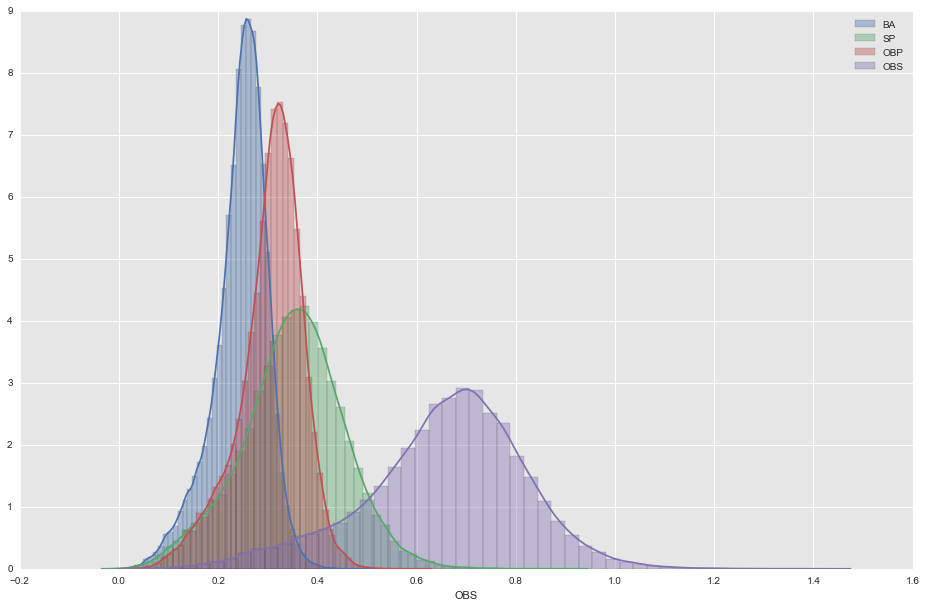

In [314]:
plt.figure(figsize=(16,10))
sns.distplot(batting_player_year.BA, label='BA', axlabel='adff')
sns.distplot(batting_player_year.SP, label='SP')
sns.distplot(batting_player_year.OBP, label='OBP')
sns.distplot(batting_player_year.OBS, label='OBS')
plt.legend()

OBS does not change much over time.

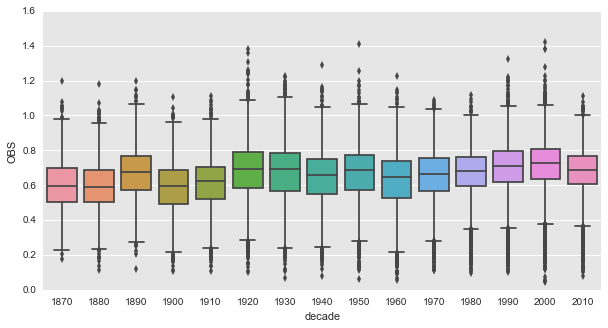

In [291]:
d = [str(x)[0:3] + '0' for x in batting_player_year['yearID']]
d = [int(x) for x in d]
batting_player_year['decade'] = d
batting_player_year = batting_player_year.sort_values(by='decade')
plt.figure(figsize=(10,5))
sns.boxplot(x="decade", y="OBS", data=batting_player_year)

## Dependant Variable
Despite the fact that OBS doesn't change much over time, we should still normallize.  Let's look at setting the positive dep var as greater than the median of OBS in a given year.  Consider +1 standard deviation.

Welp, I might stop using those boxplot arrays.  It doesn't make it look like there is much of a relationship between year and OBS.  The below scatter make the relationship clear.  Granted the scatter is using median and year, rather than all data by decade.

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


,yearID,OBS
0,1871,0.683099
1,1872,0.628424
2,1873,0.621816
3,1874,0.599295
4,1875,0.536525


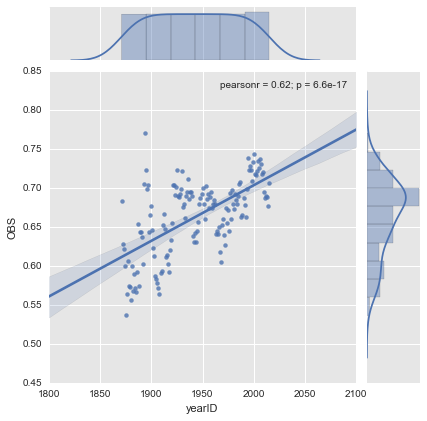

In [302]:
batting_player_year_median = batting_player_year.groupby(by='yearID').median().reset_index()[['yearID', 'OBS']]
sns.jointplot(x='yearID', y='OBS', data=batting_player_year_median, kind='reg')
batting_player_year_median.head()

It's interesting how the standard deviation changes so much.  Something like 1910 to 1970 seems different than the head and tail.

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


,yearID,OBS
0,1871,0.160935
1,1872,0.131872
2,1873,0.132444
3,1874,0.136197
4,1875,0.140813


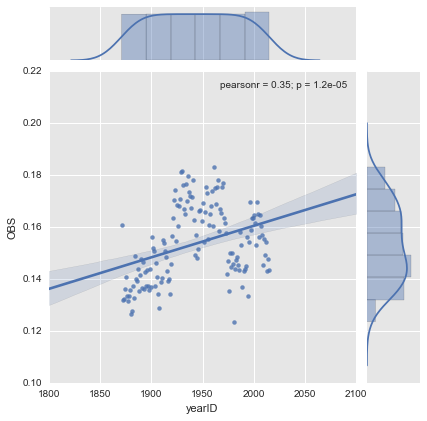

In [303]:
batting_player_year_std = batting_player_year.groupby(by='yearID').std().reset_index()[['yearID', 'OBS']]
sns.jointplot(x='yearID', y='OBS', data=batting_player_year_std, kind='reg')
batting_player_year_std.head()

In [309]:
batting_player_year_median.columns = ['yearID', 'median_OBS']
batting_player_year_std.columns = ['yearID', 'std_OBS']
batting_year_stats = batting_player_year_median.merge(batting_player_year_std, on='yearID')
batting_year_stats.head()

,yearID,median_OBS,std_OBS
0,1871,0.683099,0.160935
1,1872,0.628424,0.131872
2,1873,0.621816,0.132444
3,1874,0.599295,0.136197
4,1875,0.536525,0.140813


In [330]:
batting_player_year_w_stats = pd.merge(batting_player_year, batting_year_stats, how='left', on=['yearID'])
batting_player_year_w_stats['gte_median'] = batting_player_year_w_stats.OBS >= batting_player_year_w_stats.median_OBS
batting_player_year_w_stats['gte_std'] = batting_player_year_w_stats.OBS >= ( batting_player_year_w_stats.median_OBS + 
                                                                             batting_player_year_w_stats.std_OBS)
batting_player_year_w_stats = batting_player_year_w_stats[['playerID', 'yearID', 'OBS', 'median_OBS', 
                                                           'std_OBS', 'gte_median', 'gte_std']]
batting_player_year_w_stats.head()

,playerID,yearID,OBS,median_OBS,std_OBS,gte_median,gte_std
0,aaronha01,1954,0.768649,0.686339,0.172915,True,False
1,aaronha01,1955,0.906129,0.692128,0.155454,True,True
2,aaronha01,1956,0.923178,0.674533,0.160939,True,True
3,aaronha01,1957,0.977778,0.688091,0.164814,True,True
4,aaronha01,1958,0.931299,0.694931,0.167955,True,True
